### Russian Natural Gas Trade: Decade Overview
Posted on February 28, 2017 by BRYAN NOVY

How has the Russian natural gas industry fared on the global scale over the last decade?. This article will investigate the trade flow of this industry from 2006 to 2015, to see how the industry has grown and how it weathered rough periods such as the 2008 financial crisis and the Western imposition of sanctions in 2014.

Russia has achieved marked success in reviving its economy in the aftermath of the dissolution of the USSR, primarily through energy exports. The income generated by the energy trade afforded Russia the opportunity to reassert itself as a global power, to a certain degree. This assertiveness raised the ire of Western powers, who retaliated against Russia after she annexed Crimea from Ukraine in March 2014. In July of that year, the European Union and the United States imposed sanctions on two Russian energy firms, including Rosneft, two Russian banks and dozens of prominent Russian business persons. Targeting these institutions dealt a huge blow to the Russian economy, contributing to the collapse of the ruble.

How did the sanctions affect the international trade of Russian natural gas?

In [45]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [46]:
from pandas import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Collect the Data

Download data from UN COMTRADE website. We need two csv files here because the COMTRADE site only allows you to aggregate a total of 5 years.

To access this data:

go to https://comtrade.un.org/ then select 'get trade data'

select ‘type of product: goods’,

‘frequency: annual’,

‘periods: 2006 2007 2008 2009 2010’,

‘reporter: Russia’,

‘partners: world’,

‘flows: imports and exports’,

‘HS (as reported) commodity codes: 271111, Natural Gas, liquefied.  271121 Natural Gas, (Gaseous State)’.

Select the ‘Download CSV ‘ option to download the data set.

Clicking on ‘Preview’ results in a message that the data exceeds 500 rows.

Data was downloaded using the Download CSV button and the download file renamed appropriately.

Repeat same process for second half of decade

select ‘type of product: goods’,

‘frequency: annual’,

‘periods: 2011 2012 2013 2014 2015’,

‘reporter: Russia’,

‘partners: world’,

‘flows: imports and exports’,

‘HS (as reported) commodity codes: 271111, Natural Gas, liquefied.  271121 Natural Gas, (Gaseous State)’.

Select the ‘Download CSV ‘ option to download the data set.


In [47]:
Location1  = 'Russ_Gas_06.csv'

In [48]:
Location2 = 'Russ_Gas_11.csv'

In [49]:
gas1 = read_csv(Location1, dtype={'Commodity Code':str})

In [50]:
gas1.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H3,2007,2007,2007,6,1,1,Import,643,Russian Federation,...,NaN,NaN,233143700,NaN,233143700,NaN,141297232,NaN,NaN,6
1,H3,2007,2007,2007,6,1,2,Export,643,Russian Federation,...,NaN,NaN,1393710193,NaN,1393710193,NaN,482309235,NaN,NaN,6
2,H3,2008,2008,2008,6,1,1,Import,643,Russian Federation,...,NaN,NaN,53929952,NaN,53929952,NaN,33565019,NaN,NaN,0
3,H3,2008,2008,2008,6,1,2,Export,643,Russian Federation,...,NaN,NaN,617725,NaN,617725,NaN,333331,NaN,NaN,0
4,H3,2009,2009,2009,6,1,1,Import,643,Russian Federation,...,NaN,NaN,13,NaN,13,NaN,2793,NaN,NaN,0


In [51]:
gas2 = read_csv(Location2, dtype = {'Commodity Code':str})

In [52]:
gas2.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2012,2012,2012,6,1,1,Import,643,Russian Federation,...,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,4580,NaN,NaN,0
1,H4,2012,2012,2012,6,1,2,Export,643,Russian Federation,...,NaN,NaN,9.625678e+09,NaN,9.625678e+09,NaN,4679062661,NaN,NaN,0
2,H4,2013,2013,2013,6,1,1,Import,643,Russian Federation,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,255,NaN,NaN,0
3,H4,2013,2013,2013,6,1,2,Export,643,Russian Federation,...,NaN,NaN,1.184460e+10,NaN,1.184460e+10,NaN,5510957605,NaN,NaN,0
4,H4,2014,2014,2014,6,1,1,Import,643,Russian Federation,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,253,NaN,NaN,0


In [53]:
COLUMNS = ['Year','Period','Trade Flow','Reporter','Partner','Commodity','Commodity Code','Trade Value (US$)']
gas1 = gas1[COLUMNS]
gas2 = gas2[COLUMNS]

In [54]:
gas1.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2007,2007,Import,Russian Federation,World,"Natural gas, liquefied",271111,141297232
1,2007,2007,Export,Russian Federation,World,"Natural gas, liquefied",271111,482309235
2,2008,2008,Import,Russian Federation,World,"Natural gas, liquefied",271111,33565019
3,2008,2008,Export,Russian Federation,World,"Natural gas, liquefied",271111,333331
4,2009,2009,Import,Russian Federation,World,"Natural gas, liquefied",271111,2793


In [55]:
gas2.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2012,2012,Import,Russian Federation,World,"Mineral fuels, mineral oils and products of th...",271111,4580
1,2012,2012,Export,Russian Federation,World,"Mineral fuels, mineral oils and products of th...",271111,4679062661
2,2013,2013,Import,Russian Federation,World,"Mineral fuels, mineral oils and products of th...",271111,255
3,2013,2013,Export,Russian Federation,World,"Mineral fuels, mineral oils and products of th...",271111,5510957605
4,2014,2014,Import,Russian Federation,World,"Mineral fuels, mineral oils and products of th...",271111,253


In [56]:
gas2.tail()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
15,2015,2015,Export,Russian Federation,World,"Mineral fuels, mineral oils and products of th...",271121,41844333339
16,2011,2011,Import,Russian Federation,World,"Natural gas, liquefied",271111,109004
17,2011,2011,Export,Russian Federation,World,"Natural gas, liquefied",271111,3854526103
18,2011,2011,Import,Russian Federation,World,"Natural gas, in gaseous state",271121,189324447
19,2011,2011,Export,Russian Federation,World,"Natural gas, in gaseous state",271121,64144417960


In [57]:
gasWorld1 = gas1[gas1['Partner'] == 'World']
gasWorld2 = gas2[gas2['Partner'] == 'World']

In [58]:
def autoType(code):
    if code == '271111':
        return 'Liquid Natural Gas'
    if code == '271121':
        return 'Natural Gas (Gaseous State)'
    else:
        return 'unkown'

In [59]:
COMMODITY = 'Commodity'
gas1[COMMODITY] = gas1['Commodity Code'].apply(autoType)
gas2[COMMODITY] = gas2['Commodity Code'].apply(autoType)

In [60]:
YEAR = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'

headings = [YEAR, PARTNER, FLOW, COMMODITY, VALUE]
gas1 = gas1[headings]
gas2 = gas2[headings]

In [61]:
gas1.head()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2007,World,Import,Liquid Natural Gas,141297232
1,2007,World,Export,Liquid Natural Gas,482309235
2,2008,World,Import,Liquid Natural Gas,33565019
3,2008,World,Export,Liquid Natural Gas,333331
4,2009,World,Import,Liquid Natural Gas,2793


In [62]:
gas1.tail()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
14,2010,World,Import,Natural Gas (Gaseous State),133287162
15,2010,World,Export,Natural Gas (Gaseous State),48091706091
16,2006,World,Export,Liquid Natural Gas,134351
17,2006,World,Import,Natural Gas (Gaseous State),115474918
18,2006,World,Export,Natural Gas (Gaseous State),42840363545


In [63]:
gas2.head()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2012,World,Import,Liquid Natural Gas,4580
1,2012,World,Export,Liquid Natural Gas,4679062661
2,2013,World,Import,Liquid Natural Gas,255
3,2013,World,Export,Liquid Natural Gas,5510957605
4,2014,World,Import,Liquid Natural Gas,253


In [64]:
#Concatenate

In [65]:
gas2.index = range(19,39)
gas2

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
19,2012,World,Import,Liquid Natural Gas,4580
20,2012,World,Export,Liquid Natural Gas,4679062661
21,2013,World,Import,Liquid Natural Gas,255
22,2013,World,Export,Liquid Natural Gas,5510957605
23,2014,World,Import,Liquid Natural Gas,253
24,2014,World,Export,Liquid Natural Gas,5243510938
25,2015,World,Import,Liquid Natural Gas,212
26,2015,World,Export,Liquid Natural Gas,4546148086
27,2012,World,Import,Natural Gas (Gaseous State),224596425
28,2012,World,Export,Natural Gas (Gaseous State),62253296715


In [66]:
frames = [gas1, gas2]

In [67]:
result_cat =pd.concat(frames)
result_cat

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2007,World,Import,Liquid Natural Gas,141297232
1,2007,World,Export,Liquid Natural Gas,482309235
2,2008,World,Import,Liquid Natural Gas,33565019
3,2008,World,Export,Liquid Natural Gas,333331
4,2009,World,Import,Liquid Natural Gas,2793
5,2009,World,Export,Liquid Natural Gas,835783775
6,2010,World,Import,Liquid Natural Gas,6915
7,2010,World,Export,Liquid Natural Gas,2986673082
8,2007,World,Import,Natural Gas (Gaseous State),137279778
9,2007,World,Export,Natural Gas (Gaseous State),42749221693


In [68]:
result_year = result_cat.sort(YEAR)
result_year

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
18,2006,World,Export,Natural Gas (Gaseous State),42840363545
17,2006,World,Import,Natural Gas (Gaseous State),115474918
16,2006,World,Export,Liquid Natural Gas,134351
0,2007,World,Import,Liquid Natural Gas,141297232
1,2007,World,Export,Liquid Natural Gas,482309235
9,2007,World,Export,Natural Gas (Gaseous State),42749221693
8,2007,World,Import,Natural Gas (Gaseous State),137279778
11,2008,World,Export,Natural Gas (Gaseous State),66469805678
10,2008,World,Import,Natural Gas (Gaseous State),173668395
3,2008,World,Export,Liquid Natural Gas,333331


In [69]:
new_gas = result_year.reset_index()
new_gas

,index,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,18,2006,World,Export,Natural Gas (Gaseous State),42840363545
1,17,2006,World,Import,Natural Gas (Gaseous State),115474918
2,16,2006,World,Export,Liquid Natural Gas,134351
3,0,2007,World,Import,Liquid Natural Gas,141297232
4,1,2007,World,Export,Liquid Natural Gas,482309235
5,9,2007,World,Export,Natural Gas (Gaseous State),42749221693
6,8,2007,World,Import,Natural Gas (Gaseous State),137279778
7,11,2008,World,Export,Natural Gas (Gaseous State),66469805678
8,10,2008,World,Import,Natural Gas (Gaseous State),173668395
9,3,2008,World,Export,Liquid Natural Gas,333331


In [70]:
new_gas = new_gas[headings]
new_gas

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2006,World,Export,Natural Gas (Gaseous State),42840363545
1,2006,World,Import,Natural Gas (Gaseous State),115474918
2,2006,World,Export,Liquid Natural Gas,134351
3,2007,World,Import,Liquid Natural Gas,141297232
4,2007,World,Export,Liquid Natural Gas,482309235
5,2007,World,Export,Natural Gas (Gaseous State),42749221693
6,2007,World,Import,Natural Gas (Gaseous State),137279778
7,2008,World,Export,Natural Gas (Gaseous State),66469805678
8,2008,World,Import,Natural Gas (Gaseous State),173668395
9,2008,World,Export,Liquid Natural Gas,333331


### Total Natural Gas Trade Over Last Decade

To look at the trade balance of Russian natural gas, the data is split into two groups: exports from Russia and imports into Russia from 2006 to 2015. The values in these groups are added to get the total trade value, and we can use this to investigate trade balances.

In [71]:
#Value of Trade Flow

grouped = new_gas.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Export    558460558405
Import      1926204921
Name: Trade Value (US$), dtype: int64

In [72]:
#Value of Trade Surplus

558460558405 - 1926204921

556534353484

Trade Surplus is $556,534,353,484 

### Russian Gas Imports

In [73]:
new_gas_world = new_gas[new_gas['Partner']=='World']

In [74]:
imports = new_gas_world[new_gas_world[FLOW] == 'Import']
grouped = imports.groupby([YEAR])
print('The Value of Russian Natural Gas Imports per Year Over the Last 10 Years')
totalImports = grouped[VALUE].aggregate(sum)
totalImports

The Value of Russian Natural Gas Imports per Year Over the Last 10 Years


Period
2006    115474918
2007    278577010
2008    207233414
2009    159155805
2010    133294077
2011    189433451
2012    224601005
2013    221696407
2014    223994527
2015    172744307
Name: Trade Value (US$), dtype: int64

Sanctions had an effect? Maybe!

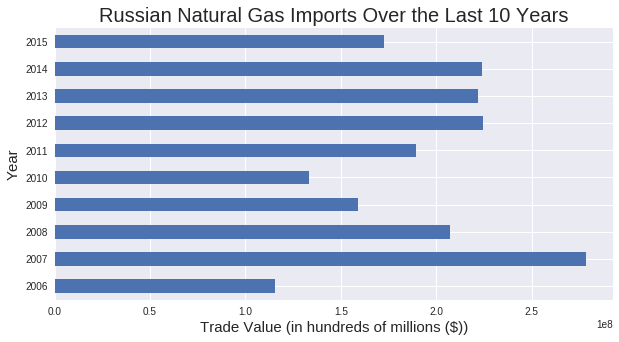

In [75]:
importPlot = totalImports.plot(kind='barh',figsize=(10,5))
importPlot.set_xlabel('Trade Value (in hundreds of millions ($))',fontsize=15)
importPlot.set_title('Russian Natural Gas Imports Over the Last 10 Years', fontsize=20)
importPlot.set_ylabel('Year', fontsize=15)

### Russian Gas Exports

In [76]:
exports = new_gas_world[new_gas_world[FLOW]=='Export']
grouped = exports.groupby([YEAR])
print('The Value of Natural Gas Exports from Russia per Year Over the Last 10 Years')
totalExports = grouped[VALUE].aggregate(sum)
totalExports

The Value of Natural Gas Exports from Russia per Year Over the Last 10 Years


Period
2006    42840497896
2007    43231530928
2008    66470139009
2009    40291128585
2010    51078379173
2011    67998944063
2012    66932359376
2013    72743259323
2014    60483838627
2015    46390481425
Name: Trade Value (US$), dtype: int64

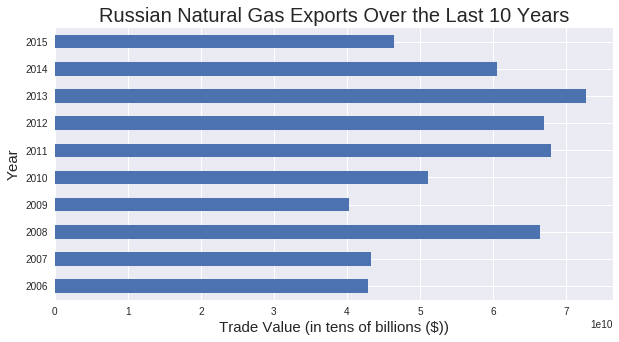

In [77]:
exportPlot = totalExports.plot(kind='barh',figsize=(10,5))
exportPlot.set_xlabel('Trade Value (in tens of billions ($))',fontsize=15)
exportPlot.set_title('Russian Natural Gas Exports Over the Last 10 Years',fontsize=20)
exportPlot.set_ylabel('Year',fontsize=15)

Big drops seem to correspond with the 2008 financial crash and the 2014 Sanctions

### Russian Gas Trade Surplus per Year

In [78]:
surplus = totalExports - totalImports

In [79]:
print('The Value of the Russian Natural Gas Trade Surplus Per Year Over the Last 10 Years:')
surplus

The Value of the Russian Natural Gas Trade Surplus Per Year Over the Last 10 Years:


Period
2006    42725022978
2007    42952953918
2008    66262905595
2009    40131972780
2010    50945085096
2011    67809510612
2012    66707758371
2013    72521562916
2014    60259844100
2015    46217737118
Name: Trade Value (US$), dtype: int64

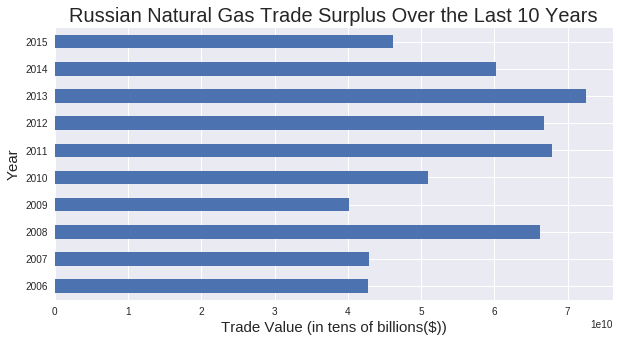

In [80]:
surplusPlot = surplus.plot(kind = 'barh', figsize=(10,5))
surplusPlot.set_xlabel('Trade Value (in tens of billions($))',fontsize = 15)
surplusPlot.set_title('Russian Natural Gas Trade Surplus Over the Last 10 Years',fontsize=20)
surplusPlot.set_ylabel('Year',fontsize=15)

### Conclusion

This article analyzed the Russian energy trade in terms of trade value, income (exports) and goods (imports). For the 10 years between 2006 to 2015, Russia enjoyed a trade surplus of well over half a trillion dollars.

2008 was a phenomenal year for Russian energy exports, with a 34.9% increase in trade value over 2007. Exports saw an even more dramatic drop in 2009, however,  decreasing by 39.3% from 2008. This drop coincides with the global downturn following the 2008 financial crisis.

Imported energy in Russia seems to be a much less significant market relative to exports ($1 billion over 10 years compared to $560 billion). Imports peaked in 2007, at $278 million. Import value dropped by $51 million in 2015, right after the sanctions were implemented.

The surplus climbed to $72.5 billion dollars by 2013 but slumped to $46 billion in 2015, a 36.3% drop. This is a consequence on the Western sanctions imposed on Russia. The difference in the surplus of 2013 and 2015 is $26.3 billion.

The sanctions impacted the Russian economy. It remains to be seen if their energy sector can begin to recover without having the sanctions lifted first. It will be interesting to see what the data from 2016 shows.

The American president Donald Trump may be seeking to have the sanctions against Russia removed. They were put in place by his predecessor, Barack Obama, as a means of trying to dissuade Russia from continuing or escalating its quasi-military campaign against Ukraine. President Trump’s National Security Advisory Micheal Flynn was forced to step down when it was revealed that he had discussed the sanctions issue with the Russian ambassador before he had been sworn into office.

To sum up, the Russian energy trade is big business worth hundreds of billions of dollars. It recovered from the 2008 financial crisis but seems to be coming undone by another crisis: Western sanctions.